In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df_normal = pd.read_csv(r'.\normal_data.csv')
df_normal.head()

,HTML_tag,img_tag,dots,urls,account,ebay,paypal,email,please,information,message,bank,policy,access,member,update,target
0,1,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,Normal
1,0,0,3,3,0,0,0,1,0,0,0,0,0,0,0,0,Normal
2,0,0,3,3,0,0,0,1,0,0,0,0,0,0,0,0,Normal
3,0,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,Normal
4,0,0,3,4,0,0,0,1,0,0,1,0,0,0,0,0,Normal


In [3]:
df_phishing = pd.read_csv(r'.\Phishing_data.csv')
df_phishing.head()

,HTML_tag,img_tag,dots,urls,account,ebay,paypal,email,please,information,message,bank,policy,access,member,update,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Phishing
1,23,0,3,1,1,1,0,0,1,1,0,0,1,0,1,1,Phishing
2,95,12,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Phishing
3,101,1,2,2,1,0,1,1,1,1,0,0,1,1,1,1,Phishing
4,110,7,6,3,1,0,1,1,1,1,0,0,0,1,1,1,Phishing


In [4]:
df = pd.concat([df_normal, df_phishing], axis=0)
df = df.sample(frac=1.0, random_state=21).reset_index(drop=True)
df.head()

,HTML_tag,img_tag,dots,urls,account,ebay,paypal,email,please,information,message,bank,policy,access,member,update,target
0,25,0,2,1,1,0,1,0,1,1,0,0,0,0,1,0,Phishing
1,101,1,2,2,1,0,1,1,1,1,0,0,1,1,1,1,Phishing
2,32,0,4,1,0,0,0,1,1,0,0,1,0,1,0,1,Phishing
3,0,0,3,3,0,0,0,1,0,0,0,0,0,0,0,0,Normal
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Normal


In [5]:
print('Rows    :', df.shape[0])
print('Columns :', df.shape[1])

Rows    : 4809
Columns : 17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HTML_tag     4809 non-null   int64 
 1   img_tag      4809 non-null   int64 
 2   dots         4809 non-null   int64 
 3   urls         4809 non-null   int64 
 4   account      4809 non-null   int64 
 5   ebay         4809 non-null   int64 
 6   paypal       4809 non-null   int64 
 7   email        4809 non-null   int64 
 8   please       4809 non-null   int64 
 9   information  4809 non-null   int64 
 10  message      4809 non-null   int64 
 11  bank         4809 non-null   int64 
 12  policy       4809 non-null   int64 
 13  access       4809 non-null   int64 
 14  member       4809 non-null   int64 
 15  update       4809 non-null   int64 
 16  target       4809 non-null   object
dtypes: int64(16), object(1)
memory usage: 638.8+ KB


In [7]:
df.describe()

,HTML_tag,img_tag,dots,urls,account,ebay,paypal,email,please,information,message,bank,policy,access,member,update
count,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000
mean,35.647328,2.726346,1.882720,2.192348,0.270534,0.114577,0.118112,0.337908,0.361822,0.238095,0.222499,0.151383,0.132252,0.212310,0.217093,0.176336
std,71.487930,7.960827,1.279385,2.912588,0.444282,0.318544,0.322774,0.473046,0.480578,0.425962,0.415968,0.358459,0.338800,0.408986,0.412309,0.381145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1043.000000,68.000000,9.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
categorical_features = []
continous_feature = []

for col in df.columns:
    print('Feature:', col)
    unique = df[col].nunique()
    
    if unique <= 10:
        print(df[col].value_counts())
        categorical_features.append(col)
    else:
        print('Total unique values:', unique)
        continous_feature.append(col)
    
    print('-'*40)

Feature: HTML_tag
Total unique values: 238
----------------------------------------
Feature: img_tag
Total unique values: 46
----------------------------------------
Feature: dots
2    1675
3    1439
0    1162
1     278
4     202
5      27
6      21
9       2
7       2
8       1
Name: dots, dtype: int64
----------------------------------------
Feature: urls
Total unique values: 31
----------------------------------------
Feature: account
0    3508
1    1301
Name: account, dtype: int64
----------------------------------------
Feature: ebay
0    4258
1     551
Name: ebay, dtype: int64
----------------------------------------
Feature: paypal
0    4241
1     568
Name: paypal, dtype: int64
----------------------------------------
Feature: email
0    3184
1    1625
Name: email, dtype: int64
----------------------------------------
Feature: please
0    3069
1    1740
Name: please, dtype: int64
----------------------------------------
Feature: information
0    3664
1    1145
Name: information,

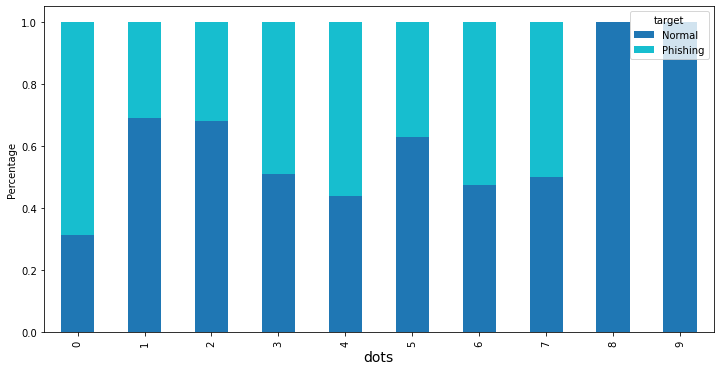

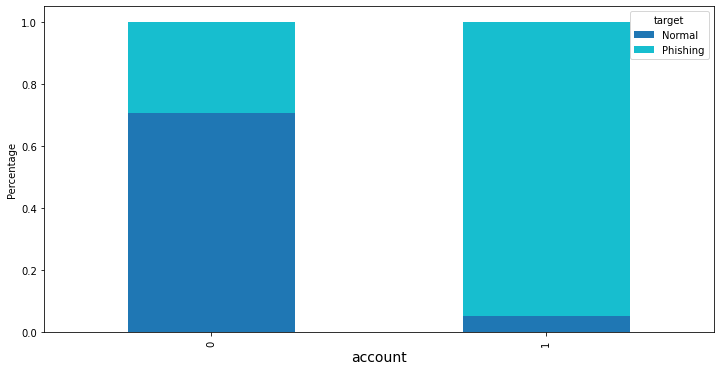

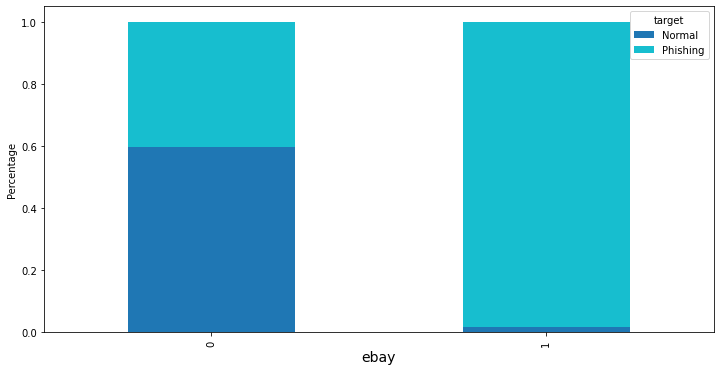

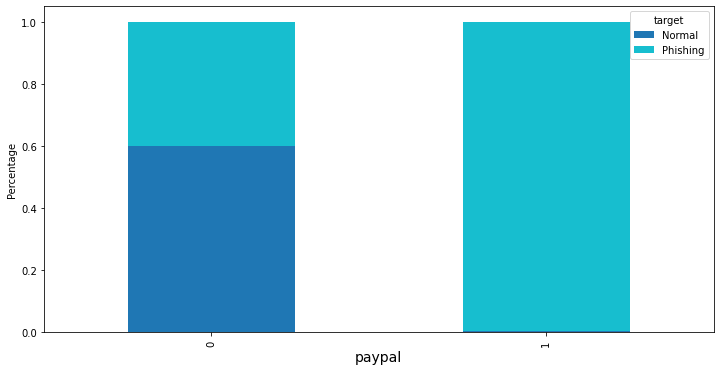

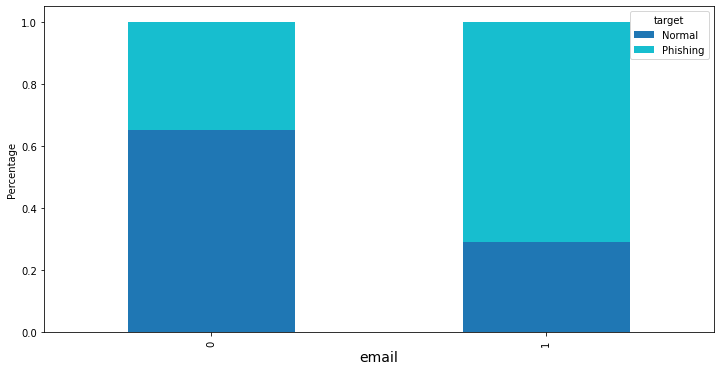

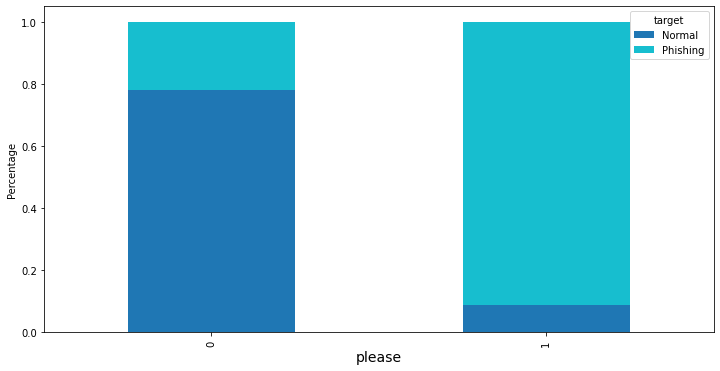

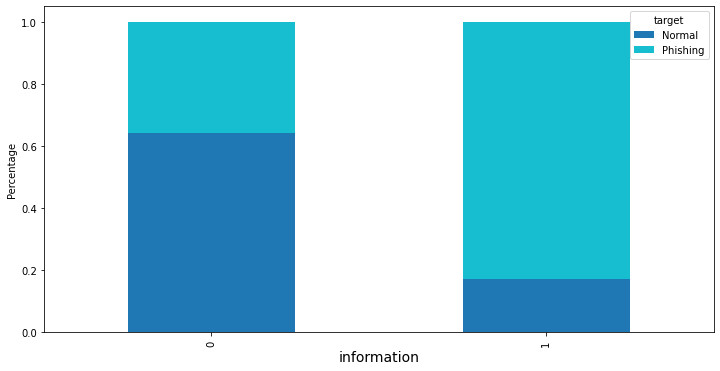

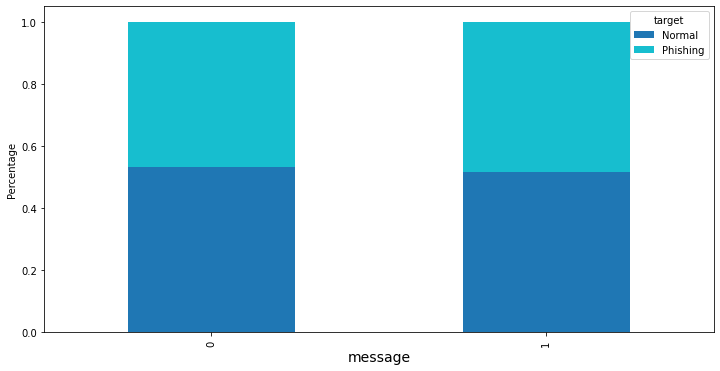

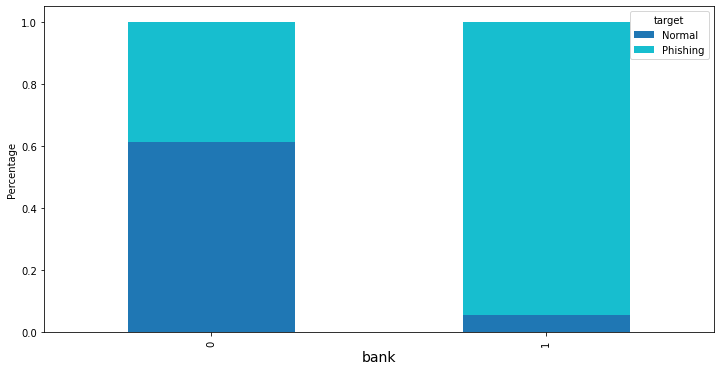

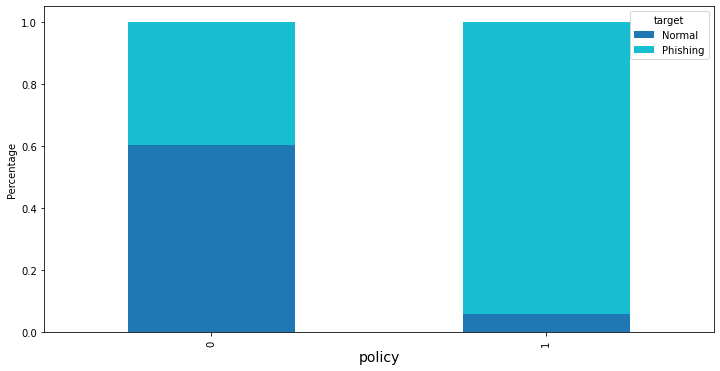

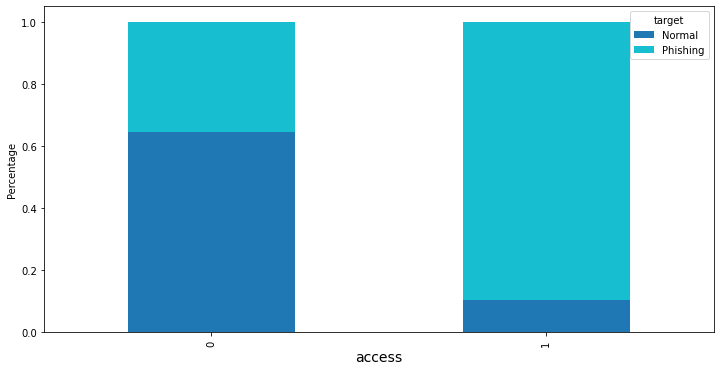

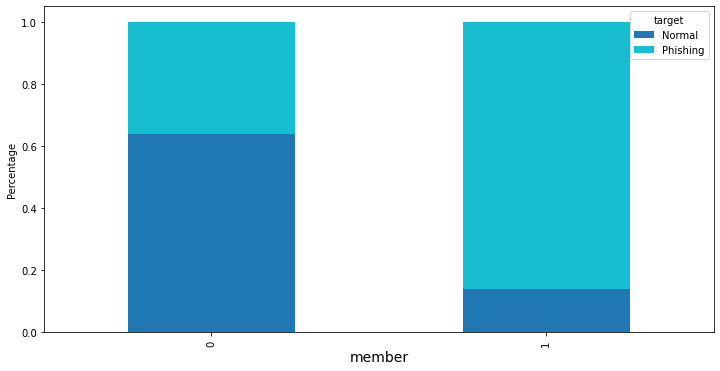

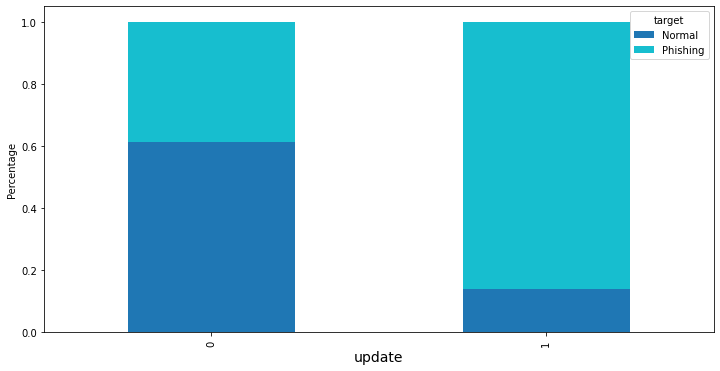

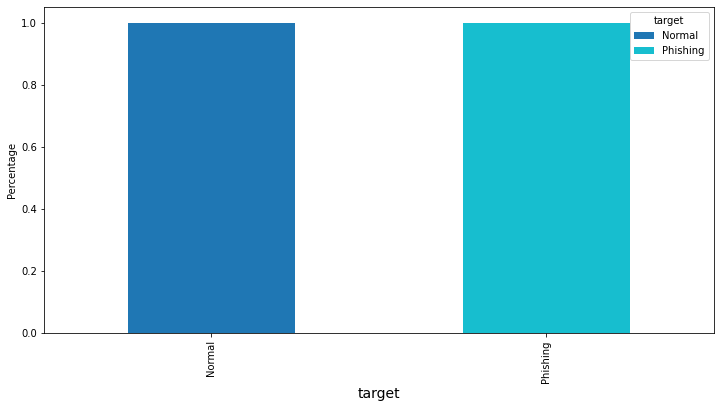

In [9]:
for cat_col in categorical_features:
    pd.crosstab(df[cat_col], df['target'], normalize='index').plot(kind='bar', stacked=True, colormap='tab10')
    plt.xlabel(cat_col, fontsize=14)
    plt.ylabel('Percentage')
    plt.show()

In [10]:
df = df.drop('message', axis=1)

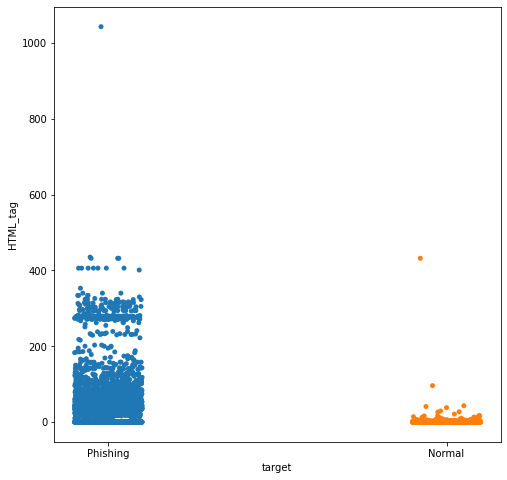

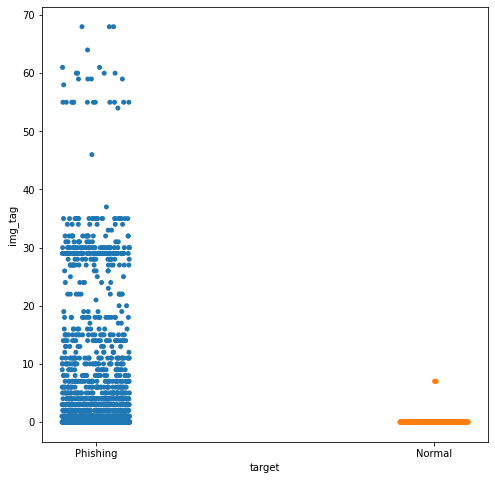

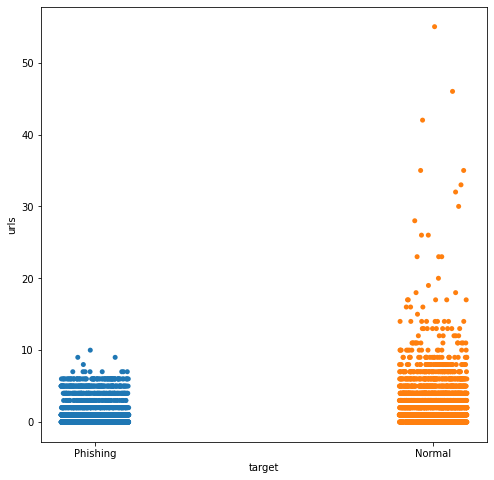

In [11]:
for cnt_col in continous_feature:
    fig = plt.figure(figsize=(8,8))
    ax = sns.stripplot(data=df, x='target', y=cnt_col)
    plt.plot()

In [12]:
df['urls'] = np.where(df['urls']>20, 20, df['urls'])
df['HTML_tag'] = np.where(df['HTML_tag']>50, 50, df['HTML_tag'])
df['img_tag'] = np.where(df['img_tag']==0, 0, 1)
df['target'] = np.where(df['target'] == 'Phishing', 1, 0)

In [14]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify=y, random_state=1)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
def best_estimator(model_name, model, params):

    grid = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='accuracy',verbose=2, n_jobs=-1)
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_

    train_pred = best_model.predict(X_train_scaled)
    test_pred = best_model.predict(X_test_scaled)
    train_score = best_model.score(X_train_scaled, y_train)
    test_score = best_model.score(X_test_scaled, y_test)

    print('>       Best Parameters:', grid.best_params_)
    print('>            Best Score:', round(grid.best_score_,4))
    print('> Training set accuracy:', round(train_score,4))
    print('>  Testing set accuracy:', round(test_score, 4))
    
    cf_matrix = confusion_matrix(y_test, test_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    ax.set_xlabel('\nPredicted Values', fontsize=12)
    ax.set_ylabel('Actual Values\n', fontsize=12)
    ax.set_title('Confusion Matrix :: Testing Set\n', fontsize=15)
    ax.xaxis.set_ticklabels(['Normal', 'Phishing'])
    ax.yaxis.set_ticklabels(['Normal', 'Phishing'])
    plt.show()
    
    return best_model

In [32]:
y_pred = best_models[3].predict(X_test_scaled)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       510
           1       0.89      1.00      0.94       452

    accuracy                           0.94       962
   macro avg       0.95      0.95      0.94       962
weighted avg       0.95      0.94      0.94       962

[[457  53]
 [  2 450]]


In [25]:
from sklearn.metrics import classification_report



ModuleNotFoundError: No module named 'sklearnl'

--------------------------------------------------------------------------------
                               Logistic Regression                               
--------------------------------------------------------------------------------
Fitting 10 folds for each of 14 candidates, totalling 140 fits
>       Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
>            Best Score: 0.9108
> Training set accuracy: 0.9111
>  Testing set accuracy: 0.92


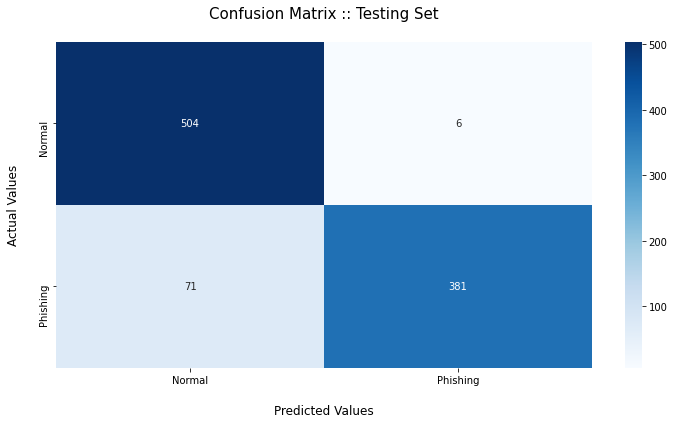


--------------------------------------------------------------------------------
                                       SVC                                       
--------------------------------------------------------------------------------
Fitting 10 folds for each of 75 candidates, totalling 750 fits
>       Best Parameters: {'C': 10, 'gamma': 1.5, 'kernel': 'rbf'}
>            Best Score: 0.935
> Training set accuracy: 0.9436
>  Testing set accuracy: 0.9241


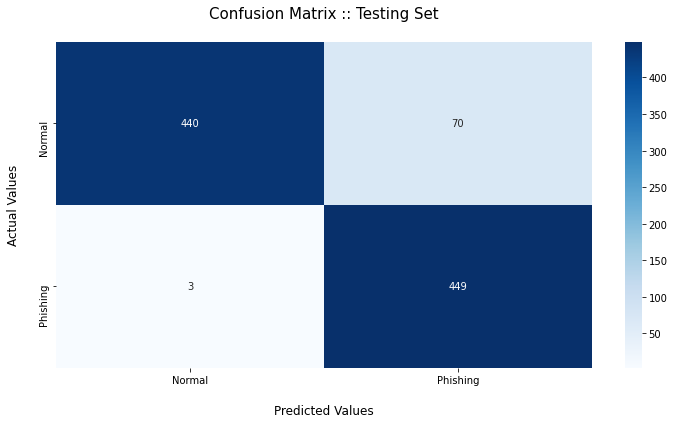


--------------------------------------------------------------------------------
                                  Decision Tree                                  
--------------------------------------------------------------------------------
Fitting 10 folds for each of 40 candidates, totalling 400 fits
>       Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 15}
>            Best Score: 0.9439
> Training set accuracy: 0.9465
>  Testing set accuracy: 0.9356


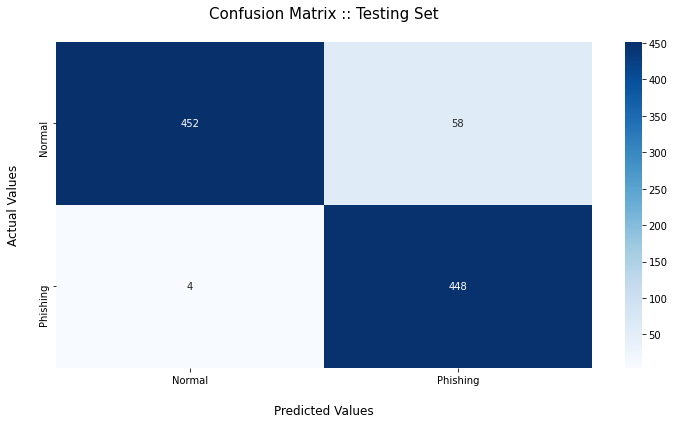


--------------------------------------------------------------------------------
                            Random Forest Classifier                             
--------------------------------------------------------------------------------
Fitting 10 folds for each of 12 candidates, totalling 120 fits
>       Best Parameters: {'max_depth': 8, 'n_estimators': 50}
>            Best Score: 0.948
> Training set accuracy: 0.9514
>  Testing set accuracy: 0.9428


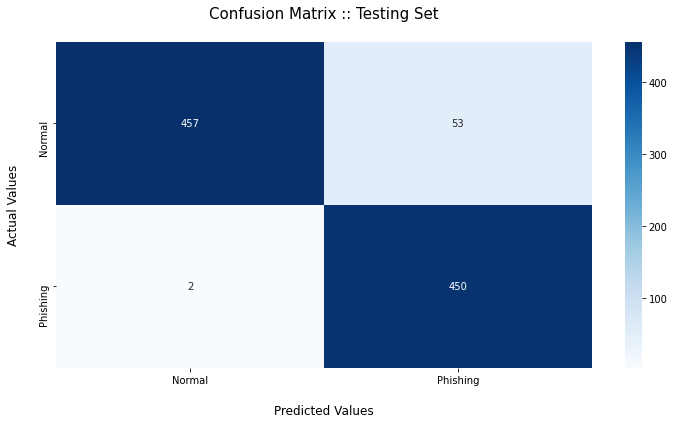


--------------------------------------------------------------------------------
                              Bernoulli Naive Bayes                              
--------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits
>       Best Parameters: {'alpha': 1}
>            Best Score: 0.903
> Training set accuracy: 0.9041
>  Testing set accuracy: 0.9085


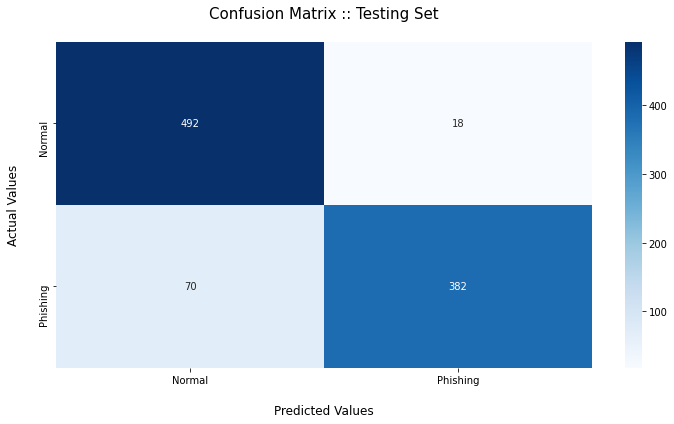

In [21]:
models = {
             'Logistic Regression': LogisticRegression(),
             'SVC': SVC(),
             'Decision Tree': DecisionTreeClassifier(),
             'Random Forest Classifier': RandomForestClassifier(random_state=21),
             'Bernoulli Naive Bayes': BernoulliNB()
         }

rfc_params = {
                'n_estimators': [40, 50, 60],
                'max_depth': [6, 8, 10, 12]
             }

lr_params = {
                'solver': ['liblinear'],
                'penalty': ['l1', 'l2'],
                'C': np.logspace(-3,3,7)
            }


svc_params = {
                 'C': [2, 3, 4, 5, 10],
                 'kernel': ['poly', 'rbf', 'sigmoid'],
                 'gamma': [0.1, 0.5, 1, 1.5, 2]
             }

dt_params = {
                'criterion': ['gini', 'entropy'],
                'max_depth': [6, 10, 14, 16],
                'max_leaf_nodes': [2, 5, 8, 10, 15]
             }

bnb_params = {
                'alpha': [1]
             }

model_params = {
                 'Logistic Regression': lr_params,
                 'SVC': svc_params,
                 'Decision Tree': dt_params,
                 'Random Forest Classifier': rfc_params,
                 'Bernoulli Naive Bayes': bnb_params
               }


best_models = []

for model_name, model in models.items():
    
    print('-'*80)
    print('{:^81}'.format(model_name))
    print('-'*80)
    best_models.append(best_estimator(model_name, model, model_params[model_name]))
    print()

Text(0.5, 1.0, 'Feature Importance')

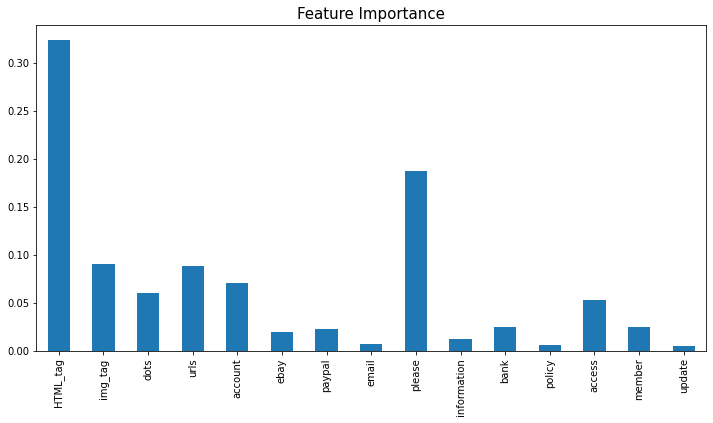

In [20]:
pd.Series(best_models[3].feature_importances_, index=X_train.columns).plot(kind='bar')
plt.title('Feature Importance', fontsize=15)